In [1]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import pycountry
import plotly.express as px

import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#Racing Bar Chart
import bar_chart_race as bcr
from IPython.display import HTML

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

import statistics
import math

In [2]:
# reading city_day.csv file using pandas
city_day= pd.read_csv('city_day.csv')
# showing first 5 rows
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
#showing details of each columns
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
# to show missing values from row 500 to 520
city_day[500:520]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
500,Ahmedabad,2016-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,Ahmedabad,2016-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,Ahmedabad,2016-05-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,Ahmedabad,2016-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,Ahmedabad,2016-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,Ahmedabad,2016-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,Ahmedabad,2016-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,Ahmedabad,2016-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,Ahmedabad,2016-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,Ahmedabad,2016-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# to show missing values of each column in percentage
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(city_day)
missing_values.style.background_gradient(cmap='YlOrRd')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.300000
PM10,11140,37.700000
NH3,10328,35.000000
Toluene,8041,27.200000
Benzene,5623,19.000000
AQI,4681,15.900000
AQI_Bucket,4681,15.900000
PM2.5,4598,15.600000
NOx,4185,14.200000
O3,4022,13.600000


<AxesSubplot:>

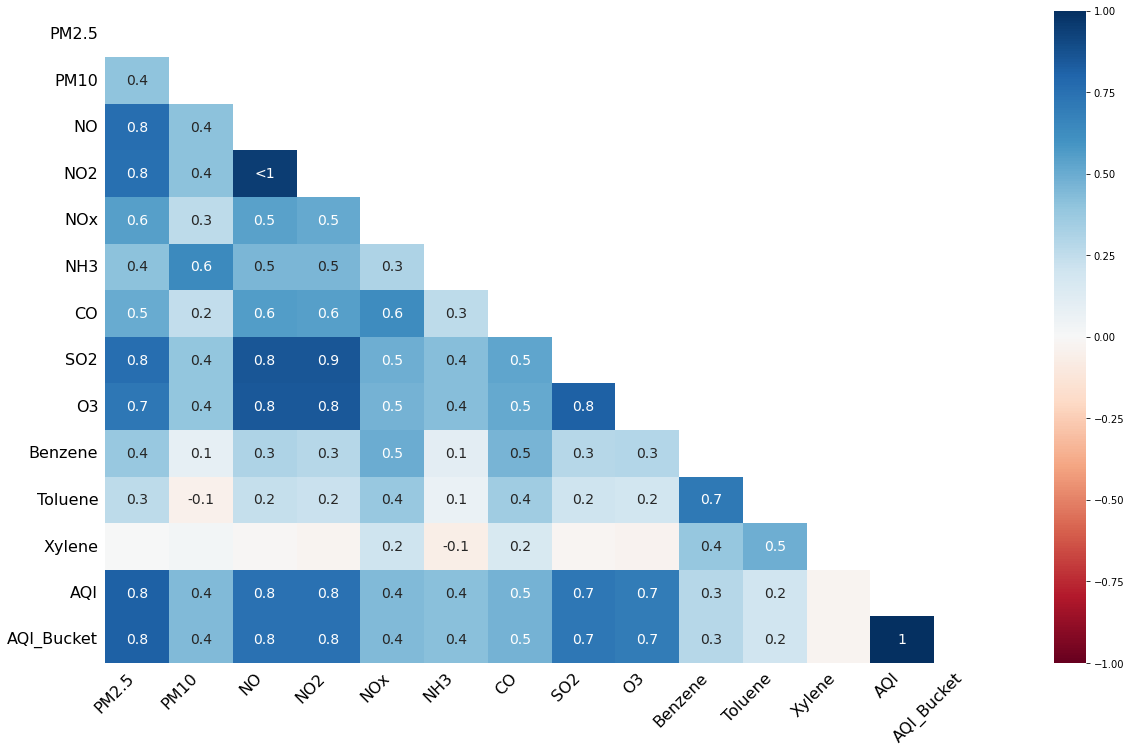

In [6]:
#to identify the correlations of nullity between the columns
import missingno as msno
msno.heatmap(city_day)

In [7]:
#imputing missing values using interpolation
new_df = city_day.interpolate(limit_direction="both")

#imputing AQI_Bucket column according to AQI column.
i=0
while(i<len(new_df)):
    if new_df['AQI'][i]<51.0:
        new_df['AQI_Bucket'][i] = 'Good'
    elif 50.0<new_df['AQI'][i]<101.0:
        new_df['AQI_Bucket'][i] = 'Satisfactory'
    elif 100.0<new_df['AQI'][i]<201.0:
        new_df['AQI_Bucket'][i] = 'Moderate'
    elif 200.0<new_df['AQI'][i]<301.0:
        new_df['AQI_Bucket'][i] = 'Poor'
    elif 300.0<new_df['AQI'][i]<401.0:
        new_df['AQI_Bucket'][i] = 'Very Poor'
    else:
        new_df['AQI_Bucket'][i] = 'Severe'
    i+=1
    
new_df
new_df.to_csv('cityday.csv')

In [54]:
new_df.head()
# if(new_df['AQI'][0]== 13):
#     print('true')
# else:
#     print('false')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor


In [9]:
#showing first 50 rows after data cleaning
new_df[1:50] 

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1,Ahmedabad,2015-01-02,73.24,141.54,0.970,15.69,16.46,26.64,0.970,24.55,34.06,3.68,5.50,3.77,209.0,Poor
2,Ahmedabad,2015-01-03,73.24,141.54,17.400,19.30,29.70,26.64,17.400,29.07,30.70,6.80,16.40,2.25,209.0,Poor
3,Ahmedabad,2015-01-04,73.24,141.54,1.700,18.48,17.97,26.64,1.700,18.59,36.08,4.43,10.14,1.00,209.0,Poor
4,Ahmedabad,2015-01-05,73.24,141.54,22.100,21.42,37.76,26.64,22.100,39.33,39.31,7.01,18.89,2.78,209.0,Poor
5,Ahmedabad,2015-01-06,73.24,141.54,45.410,38.48,81.50,26.64,45.410,45.76,46.51,5.42,10.83,1.93,209.0,Poor
6,Ahmedabad,2015-01-07,73.24,141.54,112.160,40.62,130.77,26.64,112.160,32.28,33.47,0.00,0.00,0.00,209.0,Poor
7,Ahmedabad,2015-01-08,73.24,141.54,80.870,36.74,96.75,26.64,80.870,38.54,31.89,0.00,0.00,0.00,209.0,Poor
8,Ahmedabad,2015-01-09,73.24,141.54,29.160,31.00,48.00,26.64,29.160,58.68,25.75,0.00,0.00,0.00,209.0,Poor
9,Ahmedabad,2015-01-10,73.24,141.54,80.615,7.04,0.00,26.64,80.615,8.29,4.55,0.00,0.00,0.00,209.0,Poor
10,Ahmedabad,2015-01-11,73.24,141.54,132.070,55.80,24.53,26.64,132.070,25.03,6.79,0.00,0.00,0.00,209.0,Poor


In [10]:
#showing last 20 rows after data cleaning
new_df.tail(20)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29511,Visakhapatnam,2020-06-12,37.67,76.27,12.17,53.59,35.52,9.85,0.97,5.74,17.35,4.77,18.89,2.85,84.0,Satisfactory
29512,Visakhapatnam,2020-06-13,22.75,86.77,3.85,38.23,22.60,9.24,0.67,10.70,27.24,3.06,8.49,1.26,81.0,Satisfactory
29513,Visakhapatnam,2020-06-14,21.33,83.23,2.81,34.56,20.43,9.78,0.58,9.37,29.44,2.29,5.91,0.97,88.0,Satisfactory
29514,Visakhapatnam,2020-06-15,24.66,100.53,3.66,37.93,22.97,9.22,0.71,7.02,28.63,3.13,6.12,1.51,92.0,Satisfactory
29515,Visakhapatnam,2020-06-16,21.06,80.51,6.67,40.33,26.81,8.81,0.63,11.09,21.69,3.77,6.55,1.69,83.0,Satisfactory
29516,Visakhapatnam,2020-06-17,17.05,73.22,6.08,36.31,24.23,6.69,0.54,11.08,26.09,2.96,6.96,1.39,90.0,Satisfactory
29517,Visakhapatnam,2020-06-18,21.16,88.80,4.94,42.96,26.79,3.22,0.68,11.05,27.65,4.38,7.65,1.69,71.0,Satisfactory
29518,Visakhapatnam,2020-06-19,14.41,66.81,6.22,40.06,26.10,7.51,1.07,13.23,27.34,2.55,8.98,1.45,110.0,Moderate
29519,Visakhapatnam,2020-06-20,26.67,86.29,3.78,37.36,22.46,15.05,0.74,11.76,41.97,3.14,11.89,1.87,74.0,Satisfactory
29520,Visakhapatnam,2020-06-21,25.96,91.75,5.65,40.22,25.78,13.32,0.71,10.10,38.27,3.10,10.26,1.57,92.0,Satisfactory


# Data Visualisation

In [11]:
most_polluted = new_df[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,396.402937,136.079821,32.926710
Delhi,258.621453,231.098382,1.976053
Gurugram,225.563133,198.285628,1.249720
Patna,225.154467,89.004532,1.431060
Lucknow,221.298407,39.988802,2.127914
Talcher,164.714595,158.110535,1.925692
Brajrajnagar,151.867068,130.138086,1.739408
Jorapokhar,147.219846,149.159029,0.747066
Guwahati,139.604582,116.604900,0.735388


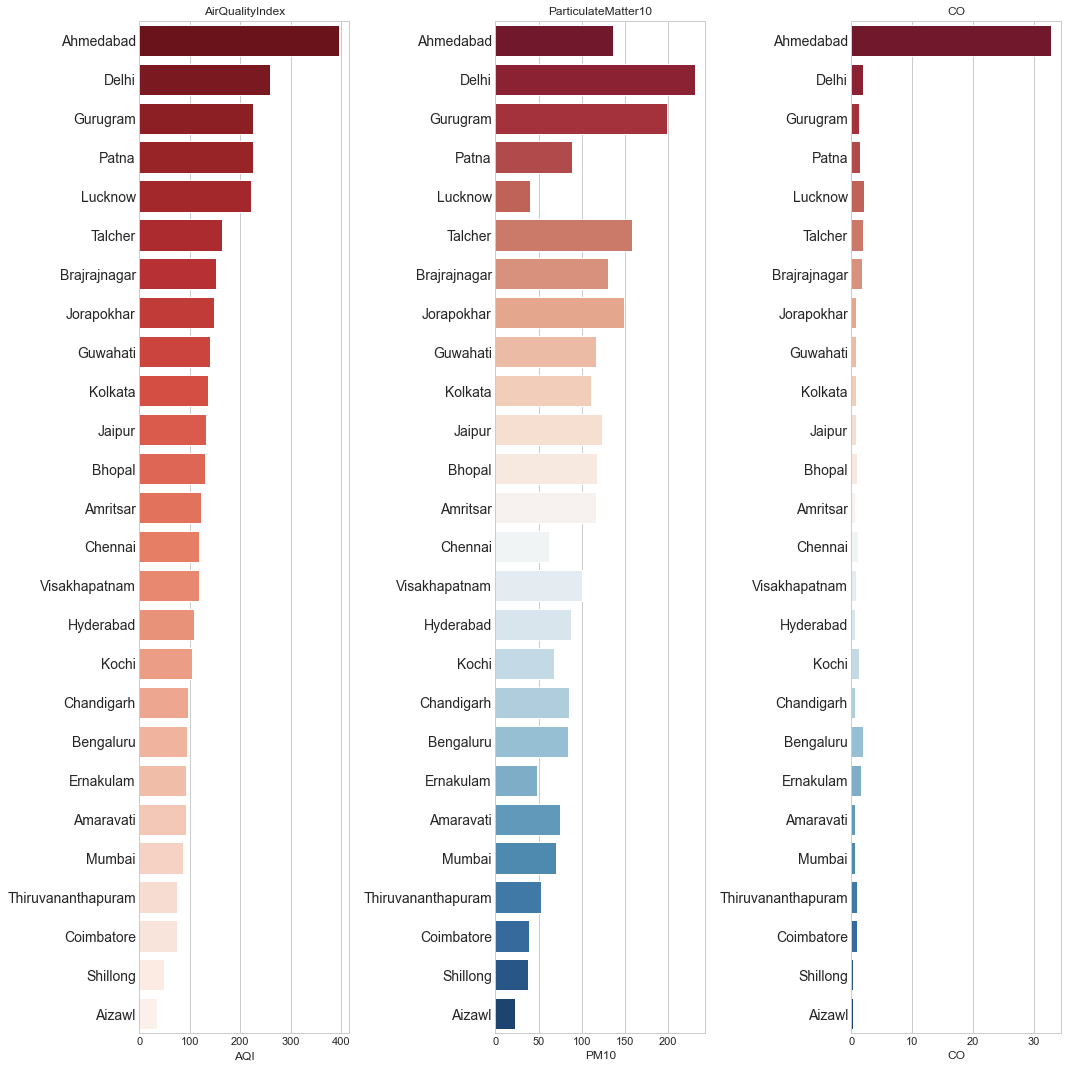

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,5
plt.style.use("fivethirtyeight")# for pretty graphs
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AirQualityIndex', 'ParticulateMatter10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()

In [13]:
from plotly.offline import init_notebook_mode, iplot 
df1 = new_df[new_df['Date'] <= ('2020-01-01')] 
df1['Pollution content(Pre COVID19)'] = new_df['PM2.5']+new_df['PM10']+new_df['NO']+new_df['NO2']+new_df['NOx']+new_df['NH3']+new_df['CO']+new_df['SO2']+new_df['O3']+new_df['Benzene']+new_df['Toluene']+new_df['Xylene']
df1.info()
def ploting(var):
    df1[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )
    plt.show()
ploting('Pollution content(Pre COVID19)')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24908 entries, 0 to 29348
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City                            24908 non-null  object 
 1   Date                            24908 non-null  object 
 2   PM2.5                           24908 non-null  float64
 3   PM10                            24908 non-null  float64
 4   NO                              24908 non-null  float64
 5   NO2                             24908 non-null  float64
 6   NOx                             24908 non-null  float64
 7   NH3                             24908 non-null  float64
 8   CO                              24908 non-null  float64
 9   SO2                             24908 non-null  float64
 10  O3                              24908 non-null  float64
 11  Benzene                         24908 non-null  float64
 12  Toluene                         

In [14]:
from plotly.offline import init_notebook_mode, iplot 
df2 = new_df[new_df['Date'] > ('2020-01-01')] 
df2['Pollution content(Post COVID19)'] = new_df['PM2.5']+new_df['PM10']+new_df['NO']+new_df['NO2']+new_df['NOx']+new_df['NH3']+new_df['CO']+new_df['SO2']+new_df['O3']+new_df['Benzene']+new_df['Toluene']+new_df['Xylene']
df2.info()
def ploting(var):
    df2[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black')
    plt.show()
ploting('Pollution content(Post COVID19)')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4623 entries, 1827 to 29530
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             4623 non-null   object 
 1   Date                             4623 non-null   object 
 2   PM2.5                            4623 non-null   float64
 3   PM10                             4623 non-null   float64
 4   NO                               4623 non-null   float64
 5   NO2                              4623 non-null   float64
 6   NOx                              4623 non-null   float64
 7   NH3                              4623 non-null   float64
 8   CO                               4623 non-null   float64
 9   SO2                              4623 non-null   float64
 10  O3                               4623 non-null   float64
 11  Benzene                          4623 non-null   float64
 12  Toluene         

In [15]:
from plotly.offline import init_notebook_mode, iplot 
def al(var):
    cities = [var]
    filtered_city_day = new_df[new_df['Date'] <= '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','AQI_Bucket']]
    AQI[var] = AQI['AQI_Bucket']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
new_df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
new_df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Pre COVID19)')

In [16]:
from plotly.offline import init_notebook_mode, iplot 
def al(var):
    cities = [var]
    filtered_city_day = new_df[new_df['Date'] > '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','AQI_Bucket']]
    AQI[var] = AQI['AQI_Bucket']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Post COVID19)')

# Data Statistics

In [17]:
df1 = new_df[new_df['Date'] <= ('2020-01-01')] 
most_polluted_1 = df1[['City', 'AQI','PM2.5','PM10','NO','NO2','NOx','NH3','SO2', 'O3','Benzene','Toluene','Xylene', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted_1

,AQI,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,O3,Benzene,Toluene,Xylene,CO
City,,,,,,,,,,,,,
Ahmedabad,411.369184,81.631193,138.932644,35.325068,50.511171,46.196420,26.640000,53.434953,36.334204,5.349518,23.812126,4.164622,35.325068
Delhi,266.456760,120.927750,238.655315,40.642162,52.565725,60.584762,42.768659,15.806576,51.259858,3.632315,16.945731,1.065638,2.068675
Gurugram,233.878090,122.737485,206.197548,19.979609,25.500184,29.643891,19.793139,9.322208,31.638714,1.219078,5.445731,5.105291,1.266373
Patna,232.105609,121.276826,85.329069,26.584323,36.673174,42.009484,36.697751,21.641223,38.026748,1.671599,10.574788,6.128643,1.464332
Lucknow,227.847017,123.772917,39.227408,15.423974,33.556970,22.875375,20.160405,12.527214,37.885077,3.006998,5.770181,0.098149,2.221281
Talcher,167.353970,59.794172,169.181958,39.111797,13.289199,38.832981,13.283634,29.071319,12.626972,0.054778,1.126626,2.511789,1.992470
Bhopal,162.672897,67.599346,143.397009,10.926822,44.725421,32.678972,23.739720,12.449252,56.996636,0.219724,0.635928,5.843723,1.178131
Brajrajnagar,156.966270,63.378241,124.183823,12.610377,16.273029,22.986706,30.528075,10.505952,11.252235,4.702202,0.476059,4.958630,2.044061
Jorapokhar,147.754306,108.260785,151.293804,8.471388,9.079975,50.399333,7.522903,42.196596,27.950223,1.858020,0.265778,2.912159,0.570972


In [18]:
df2 = new_df[new_df['Date'] > ('2020-01-01')] 
most_polluted_2 = df2[['City', 'AQI','PM2.5','PM10','NO','NO2','NOx','NH3','SO2', 'O3','Benzene','Toluene','Xylene', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted_2

,AQI,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,O3,Benzene,Toluene,Xylene,CO
City,,,,,,,,,,,,,
Ahmedabad,246.164835,43.339505,107.441868,10.655604,31.186154,22.532033,26.640000,33.705055,44.197775,3.545220,31.575055,2.028242,8.850879
Delhi,179.967033,78.714560,155.238407,22.215110,33.031538,38.312033,33.981813,13.887253,40.655769,2.662747,19.587363,0.864670,1.046264
Patna,161.142857,60.481538,122.851099,56.475385,34.192582,67.965879,17.485879,8.612033,25.014835,1.974011,5.182143,1.770659,1.124670
Guwahati,160.494505,74.174670,126.523242,23.259505,14.451758,45.136154,12.369670,14.601593,26.269505,2.415604,5.842575,1.768509,0.768077
Gurugram,157.170330,65.759451,133.207912,14.601978,21.538022,24.506703,30.529181,9.764451,51.440220,3.927527,4.651429,7.349168,1.112747
Lucknow,155.560440,75.714725,47.632026,12.265440,29.770934,24.725934,19.505824,7.609396,32.713077,12.251923,10.193352,0.008194,1.190659
Talcher,153.939560,63.193242,112.912363,20.810330,12.686456,15.369725,7.275714,24.043709,40.832143,0.056813,4.062675,2.763918,1.653077
Jorapokhar,144.321429,53.993434,137.581978,21.108571,10.211566,93.277654,8.542610,27.858599,47.826538,3.796122,0.035974,3.018358,1.702036
Brajrajnagar,130.685767,73.276181,154.871181,103.313462,17.290687,39.239973,55.016978,6.293407,41.963132,1.106319,0.353844,4.282006,0.473929


In [19]:
df1 = new_df[new_df['Date'] <= ('2020-01-01')] 
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.540,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor
1,Ahmedabad,2015-01-02,73.24,141.540,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor
2,Ahmedabad,2015-01-03,73.24,141.540,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor
3,Ahmedabad,2015-01-04,73.24,141.540,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor
4,Ahmedabad,2015-01-05,73.24,141.540,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29344,Visakhapatnam,2019-12-28,74.53,113.217,4.21,33.50,21.25,9.72,1.21,6.30,42.20,5.58,9.34,2.23,110.0,Moderate
29345,Visakhapatnam,2019-12-29,41.00,108.588,2.37,20.94,13.07,6.78,0.74,6.25,70.48,3.76,12.04,0.71,133.0,Moderate
29346,Visakhapatnam,2019-12-30,44.79,103.959,3.22,35.67,21.58,11.14,1.06,9.71,77.40,4.41,7.69,2.16,112.5,Moderate
29347,Visakhapatnam,2019-12-31,52.33,99.330,3.51,33.70,20.78,11.69,1.13,8.44,70.91,4.67,8.70,1.64,92.0,Satisfactory


In [20]:
total=len(df1)
total

24908

In [21]:
df1 = new_df[new_df['Date'] <= ('2020-01-01')] 
most_polluted = df1[['City', 'AQI','PM2.5','PM10','NO','NO2','NOx','NH3','SO2', 'O3','Benzene','Toluene','Xylene', 'CO']].groupby(['City']).std().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,O3,Benzene,Toluene,Xylene,CO
City,,,,,,,,,,,,,
Ahmedabad,279.310088,41.263975,15.378914,39.511594,44.099736,29.080792,0.000000,37.226777,20.204630,8.452509,32.942433,8.183484,39.511594
Gurugram,122.439903,104.972185,106.356668,27.069071,25.010376,29.039220,10.592652,8.885858,16.829801,4.496857,7.384152,2.946557,2.864846
Lucknow,121.868776,105.486935,4.414025,17.194598,19.477460,22.093829,14.995064,23.751328,21.419165,11.526766,14.770244,0.047244,2.764406
Patna,120.013088,90.363079,43.251892,28.292934,30.628458,37.586308,7.572697,18.743658,29.377475,3.790107,16.542398,13.462287,0.895248
Delhi,119.853535,84.472501,122.180757,33.855691,22.648943,38.065750,17.799673,8.282628,26.850577,2.488141,15.685634,2.077642,2.664069
Guwahati,108.752296,63.121840,106.093510,18.128897,4.985240,32.488847,8.543016,5.023071,14.882758,15.187671,0.310853,0.665852,0.334862
Kolkata,106.892067,62.024108,96.997104,37.161816,29.076715,55.833771,13.473409,8.968124,10.696417,10.016623,12.982325,1.077676,0.534802
Talcher,106.557938,47.673707,130.053668,41.926320,15.549246,33.675508,9.386175,15.822654,9.204177,0.378631,1.141437,0.117004,0.881891
Jorapokhar,86.375414,57.855109,109.334523,1.729066,4.315561,20.912198,2.433233,34.714802,21.176845,0.945232,0.112077,0.051794,0.634324


In [22]:
df2 = new_df[new_df['Date'] > ('2020-01-01')] 
most_polluted = df2[['City', 'AQI','PM2.5','PM10','NO','NO2','NOx','NH3','SO2', 'O3','Benzene','Toluene','Xylene', 'CO']].groupby(['City']).std().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,O3,Benzene,Toluene,Xylene,CO
City,,,,,,,,,,,,,
Ahmedabad,223.351552,22.687696,52.489862,15.122619,18.369373,17.341145,0.000000,24.392573,14.375675,2.638501,12.234312,1.761000,15.863845
Guwahati,115.612505,58.042598,91.988060,26.797998,7.742185,51.398018,8.192719,1.444465,9.667140,13.686158,0.177007,0.379150,0.529370
Delhi,87.871573,51.662941,74.993322,21.993756,13.689149,26.227515,6.751846,3.201377,11.875066,1.503192,10.276342,1.320645,0.404460
Talcher,86.051932,57.022387,93.188974,26.443727,8.877216,14.680379,5.173969,16.234430,21.418334,0.718218,0.369343,0.028720,0.594224
Lucknow,81.153998,40.375384,0.440797,11.781496,22.239683,18.861800,11.897105,3.212334,9.219133,10.690340,8.597592,0.004718,0.364885
Kolkata,75.924300,36.218002,68.346677,29.100449,23.375493,48.248547,8.731540,4.504375,13.339384,12.499571,13.453643,1.681752,0.376402
Patna,67.422486,40.680190,57.807776,24.760656,16.351466,32.993607,10.830798,3.017741,11.123564,1.204986,3.019479,1.385009,0.644617
Gurugram,63.508807,34.289265,54.899051,17.253564,9.401396,21.195464,14.787847,4.005690,19.728166,2.871423,1.627672,5.213025,0.590904
Mumbai,53.158476,27.537370,54.423413,12.720651,17.125026,27.119073,7.217679,5.094808,12.548796,3.070761,0.075922,0.029708,0.351553


In [23]:
#pre covid dev
df3 = df1.std()
print(df3)

PM2.5       69.545720
PM10        86.304154
NO          27.347635
NO2         24.700584
NOx         31.906439
NH3         24.480573
CO          14.038087
SO2         29.328576
O3          21.566554
Benzene     11.164347
Toluene     14.834973
Xylene       5.507086
AQI        142.543975
dtype: float64


In [24]:
#post covid dev
df4= df2.std()
print(df4)

PM2.5      34.755523
PM10       63.763848
NO         36.788118
NO2        16.340538
NOx        33.346820
NH3        16.605665
CO          3.544602
SO2         9.763119
O3         18.972296
Benzene    30.183614
Toluene    30.798569
Xylene      6.178334
AQI        82.304829
dtype: float64


In [25]:
#pre covid mean
df5= df1.mean()
print(df5)

PM2.5       72.545684
PM10       111.245602
NO          21.063028
NO2         28.457189
NOx         34.440708
NH3         24.219832
CO           3.731014
SO2         20.262579
O3          33.482093
Benzene      3.066522
Toluene      7.391869
Xylene       3.419426
AQI        172.238507
dtype: float64


In [26]:
#post covid mean
df6= df2.mean()
print(df6)

PM2.5       43.696789
PM10        88.390553
NO          20.059120
NO2         20.064977
NOx         31.096620
NH3         19.455462
CO           1.160834
SO2         11.984109
O3          34.087247
Benzene      5.361427
Toluene      8.298726
Xylene       3.292934
AQI        112.532287
dtype: float64


# Hypothesis Testing

In [27]:
#covid hypo
gn = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']

for x in gn:
    print("HYPOTHESIS TESTING FOR " + x )
    print("     ")
    print("H0 : μ1 = μ2  ( where μ1 is the mean of " + x + " pre covid and μ2 is mean of  " + x + "  post covid) ")
    print("H0 : μ1 > μ2 (CLAIM) ")
    print("The standardized error is :")
    dev = ((df3[x])*(df3[x])/len(df1))+((df4[x])*(df4[x])/len(df2))
    sdev = math.sqrt(dev)
    print( sdev)
    print("The standardized test statistic is :")
    m = (df5[x]-df6[x])/sdev
    print( m)
    print("since in an upper tailed Z test, if α =0.05 then the critical value is Z=1.96 ")
    if m>1.96 :
        print("So, there is enough evidence at the 5 % level to support claim that air pollution is more during pre-covid than post-covid. Hence, H0 can be rejected!")
    else:
        print("There is not enough evidence at the 5 % level to support claim that air pollution is more during pre-covid than post-covid. Hence, H0 cannot be rejected!")
    print("     ")
    print("     ")
    
    
    
 

HYPOTHESIS TESTING FOR PM2.5
     
H0 : μ1 = μ2  ( where μ1 is the mean of PM2.5 pre covid and μ2 is mean of  PM2.5  post covid) 
H0 : μ1 > μ2 (CLAIM) 
The standardized error is :
0.6748847651509859
The standardized test statistic is :
42.7464010510631
since in an upper tailed Z test, if α =0.05 then the critical value is Z=1.96 
So, there is enough evidence at the 5 % level to support claim that air pollution is more during pre-covid than post-covid. Hence, H0 can be rejected!
     
     
HYPOTHESIS TESTING FOR PM10
     
H0 : μ1 = μ2  ( where μ1 is the mean of PM10 pre covid and μ2 is mean of  PM10  post covid) 
H0 : μ1 > μ2 (CLAIM) 
The standardized error is :
1.0855943384944844
The standardized test statistic is :
21.053029387807193
since in an upper tailed Z test, if α =0.05 then the critical value is Z=1.96 
So, there is enough evidence at the 5 % level to support claim that air pollution is more during pre-covid than post-covid. Hence, H0 can be rejected!
     
     
HYPOTHESIS 

In [28]:
y= 'AQI'
feature = new_df
feature = feature.drop('Date',axis=1)
feature = feature.drop('City',axis=1)
feature = feature.drop(y,axis=1)
feature = feature.drop('AQI_Bucket',axis=1)
feature

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00
1,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77
2,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25
3,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00
4,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [90]:
label = new_df[y]
label

0        209.0
1        209.0
2        209.0
3        209.0
4        209.0
         ...  
29526     41.0
29527     70.0
29528     68.0
29529     54.0
29530     50.0
Name: AQI, Length: 29531, dtype: float64

In [151]:
X_train,X_test,y_train,y_test= train_test_split(feature,label,test_size=0.2)

In [152]:
print(X_train.shape,y_train.shape)

(23624, 12) (23624,)


In [153]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [154]:
('the accuracy of our linear regression model is: ' , lr.score(X_test,y_test)*100)

('the accuracy of our linear regression model is: ', 64.42292662777199)

In [116]:
y_pred = lr.predict(X_test)
y_pred

array([219.29679643, 129.98694337,  83.88688613, ..., 181.1597655 ,
       108.56639155, 132.06175809])

In [117]:
print('coefficients: \n',lr.coef_)

coefficients: 
 [ 0.9113959   0.21932121 -0.75617135  1.36983027  0.42003906  0.13553728
  2.57776186  0.42691857  0.05663364 -0.6292451   1.05569972 -0.2747827 ]


In [118]:
print('mean squared error: %.2f' % mean_squared_error(y_test,y_pred))

mean squared error: 6860.61


In [119]:
# the coefficient of determination: 1 is perfect determination
print('Coefficient of determination: %.2f' % r2_score(y_test,y_pred))

Coefficient of determination: 0.64


In [120]:
# the r squared value
print('R squared value: %.2f' %r2_score(y_test, y_pred))

R squared value: 0.64
